In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
b_cancer = load_breast_cancer()

In [2]:
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# data, 
b_cancer_df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)

# 열 추가하고 타겟값 넣기
b_cancer_df['diagnosis']= b_cancer.target
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
print('유방암 진단 데이터셋 크기: ', b_cancer_df.shape)

print()

b_cancer_df.info()

유방암 진단 데이터셋 크기:  (569, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14

In [5]:
# 속성값의 스케일이 많이 다르다 -> 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

#정규화 이전
print(b_cancer.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [6]:
#정규화 이후 ex) 4번쨰거 
print(b_cancer_scaled[0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#X, Y 설정하기
Y = b_cancer_df['diagnosis'] 
X = b_cancer_scaled

#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#로지스틱 회귀 분석: (1) 모델 생성
lr_b_cancer = LogisticRegression()

#로지스틱 회귀 분석: (2) 모델 훈련
lr_b_cancer.fit(X_train, Y_train)

#로지스틱 회귀 분석: (3) 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr_b_cancer.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

#오차 행렬(출력만)
confusion_matrix(Y_test, Y_predict)

array([[ 60,   3],
       [  1, 107]], dtype=int64)

In [9]:
acccuracy = accuracy_score(Y_test, Y_predict) 
precision = precision_score(Y_test, Y_predict) 
recall = recall_score(Y_test, Y_predict) 
f1 = f1_score(Y_test, Y_predict) 
roc_auc = roc_auc_score(Y_test, Y_predict)
print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}, F1: {3:.3f}'.format(acccuracy, precision, recall, f1))

정확도: 0.977, 정밀도: 0.973, 재현율: 0.991, F1: 0.982


In [10]:
print('ROC_AUC: {0:.3f}'.format(roc_auc))

ROC_AUC: 0.972


In [1]:
import numpy as np
import pandas as pd
pd.__version__

'1.5.3'

In [2]:
feature_name_df = pd.read_csv('11장_data/UCI_HAR_Dataset/features.txt', sep = '\s+', header = None, 
names = ['index', 'feature_name'], engine = 'python')
feature_name_df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [3]:
feature_name_df.shape

(561, 2)

In [4]:
#index 제거하고, feature_name만 리스트로 저장
feature_name = feature_name_df.iloc[:, 1].values.tolist()

In [ ]:
feature_name[:5]

In [6]:
X_train = pd.read_csv('./11장_data/UCI_HAR_Dataset/train/X_train.txt', sep='\s+', names = feature_name, engine = 'python')
X_test = pd.read_csv('./11장_data/UCI_HAR_Dataset/test/X_test.txt', sep='\s+', names = feature_name, engine = 'python')
Y_train = pd.read_csv('./11장_data/UCI_HAR_Dataset/train/y_train.txt', sep='\s+', header = None, names = ['action'], engine = 'python')
Y_test = pd.read_csv('./11장_data/UCI_HAR_Dataset/test/y_test.txt' , sep = '\s+', header = 
                     None, names = ['action'], engine = 'python')

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

In [ ]:
X_train.info()

In [ ]:
X_train.head()

In [ ]:
print(Y_train['action'].value_counts())

In [7]:
label_name_df = pd.read_csv('./11장_data/UCI_HAR_Dataset/activity_labels.txt', sep = '\s+', header = 
                            None, names = ['index', 'label'], engine = 'python')


In [8]:
#index 제거하고, feature_name만 리스트로 저장
label_name = label_name_df.iloc[:, 1].values.tolist()

In [ ]:
label_name

In [9]:
from sklearn.tree import DecisionTreeClassifier

#결정 트리 분류 분석: 모델 생성
dt_HAR = DecisionTreeClassifier(random_state=156)

#결정 트리 분류 분석: 모델 훈련
dt_HAR.fit(X_train, Y_train)

#결정 트리 분류 분석: 평가 데이터에 예측 수행 -> 예측 결과로 Y_predict 구하기
Y_predict = dt_HAR.predict(X_test)


In [10]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_predict)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

print('결정 트리의 현재 하이퍼 매개변수: \n', dt_HAR.get_params())

결정 트리 예측 정확도: 0.8548
결정 트리의 현재 하이퍼 매개변수: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24] # 모델7개
}

#cv: Cross validation의 flod 수(기본값은 5-fold cross validation)
grid_cv = GridSearchCV(dt_HAR, param_grid = params, scoring ='accuracy', cv = 5, return_train_score = True)

#모델 7개 + 교차학습
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [13]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]
print('최고 평균 정확도: {0:.4f}, 최적 하이퍼 매개변수: {1}'.format(grid_cv.best_score_, grid_cv.best_params_))

최고 평균 정확도: 0.8513, 최적 하이퍼 매개변수: {'max_depth': 16}


In [14]:
params = {
    'max_depth' : [8, 16, 20],
    'min_samples_split' : [8, 16, 24]
}
grid_cv = GridSearchCV(dt_HAR, param_grid = params, scoring =
'accuracy', cv = 5, return_train_score = True)

#모델 9개
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

In [15]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'param_min_samples_split', 'mean_test_score', 'mean_train_score']]

print('최고 평균 정확도: {0:.4f}, 최적 하이퍼 매개변수: {1}'.format(grid_cv.best_score_, grid_cv.best_params_))

최고 평균 정확도: 0.8549, 최적 하이퍼 매개변수: {'max_depth': 8, 'min_samples_split': 16}


In [16]:
best_dt_HAR = grid_cv.best_estimator_
best_Y_predict = best_dt_HAR.predict(X_test)
best_accuracy = accuracy_score(Y_test, best_Y_predict)
print('best 결정 트리 예측 정확도: {0:.4f}'.format(best_accuracy))


best 결정 트리 예측 정확도: 0.8717


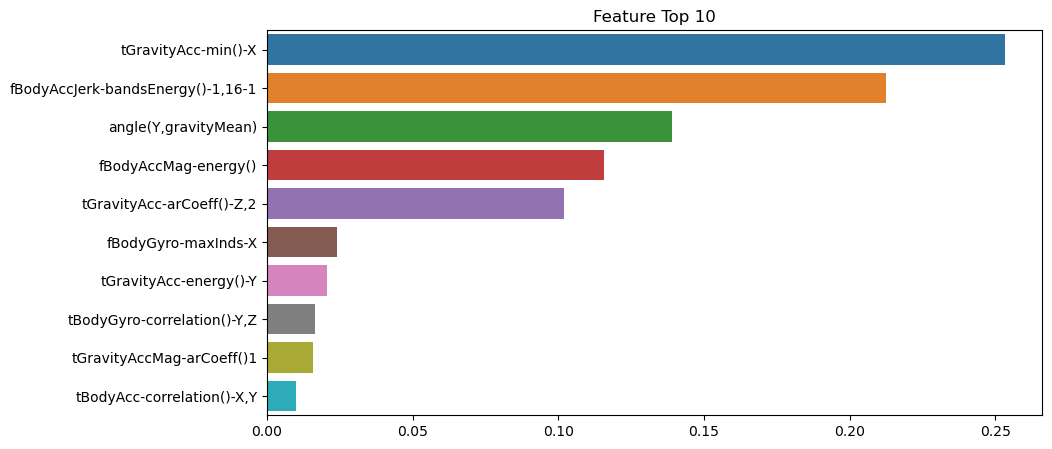

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importance_values = best_dt_HAR.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index = X_train.columns)

feature_top10 = feature_importance_values_s.sort_values(ascending = False)[:10]

plt.figure(figsize = (10, 5))
plt.title('Feature Top 10')
sns.barplot(x = feature_top10, y = feature_top10.index)
plt.show()

In [18]:
import os
###설치 경로(C:/Program Files/Graphviz/bin)를 PATH에 추가하기
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [19]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.tree import export_graphviz
#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(best_dt_HAR, out_file = "tree.dot", class_names = label_name, feature_names = 
feature_name, impurity = True, filled = True)

import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

graphviz.Source(dot_graph).render(filename='tree.png') # png로 저장

'tree.png.pdf'